<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Rearrange_Linked_List_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rearrange Linked List

Write a function that takes in the head of a Singly Linked List and an integer `k`, rearranges the list in place (i.e., doesn't create a brand new list) around nodes with value `k`, and returns its new head.

Rearranging a Linked List around nodes with value `k` means moving all nodes with a value smaller than `k` before all nodes with value `k` and moving all nodes with a value greater than `k` after all nodes with value `k`.

All moved nodes should maintain their original relative ordering if possible.

Note that the linked list should be rearranged even if it doesn't have any nodes with value `k`.

Each `LinkedList` node has an integer `value` as well as a `next` node pointing to the next node in the list or to `None` / `null` if it's the tail of the list.

You can assume that the input Linked List will always have at least one node; in other words, the head will never be `None` / `null`.

Sample Input

```
head = 3 -> 0 -> 5 -> 2 -> 1 -> 4 // the head node with value 3
k = 3
```



Sample Output

```
0 -> 2 -> 1 -> 3 -> 5 -> 4 // the new head node with value 0
// Note that the nodes with values 0, 2, and 1 have
// maintained their original relative ordering, and
// so have the nodes with values 5 and 4.
```



# Solution

In [ ]:
# This is the class of the input linked list.
class LinkedList:
  def __init__(self, value):
    self.value = value
    self.next = None

# Time O(n)
# Space O(1)
def rearrangeLinkedList(head, k, report = False):
  smaller_list_head = None
  smaller_list_tail = None
  equal_list_head = None
  equal_list_tail = None
  bigger_list_head = None
  bigger_list_tail = None
  
  node = head
  while node != None:
    if node.value < k:
      smaller_list_head, smaller_list_tail = append_link_list(smaller_list_head, smaller_list_tail, node)
    elif node.value == k:
      equal_list_head, equal_list_tail = append_link_list(equal_list_head, equal_list_tail, node)
    else:
      bigger_list_head, bigger_list_tail = append_link_list(bigger_list_head, bigger_list_tail, node)

    prev_node = node
    node = node.next
    prev_node.next = None

    if report:
      print_singly_linked_list(smaller_list_head)
      print_singly_linked_list(equal_list_head)
      print_singly_linked_list(bigger_list_head)
      print('*'*40)
  
  head, tail = connect_listed_list(smaller_list_head, smaller_list_tail, equal_list_head, equal_list_tail)
  head, tail = connect_listed_list(head, tail, bigger_list_head, bigger_list_tail)

  return head
  

def append_link_list(head, tail, node):
  if head == None:
    new_head = node
    new_tail = node
  else:
    new_head = head
    tail.next = node
    new_tail = node
  return new_head, new_tail

def connect_listed_list(head1, tail1, head2, tail2):
  new_head = head1 if head1 != None else head2
  if tail2 != None:
    new_tail = tail2
    if tail1 != None:
      tail1.next = head2
  else:
    new_tail = tail1

  return new_head, new_tail

In [ ]:
def print_singly_linked_list(singly_linked_list):
  node = singly_linked_list
  while node != None:
    print(node.value, end = '')
    node = node.next
    if node != None:
      print(' -> ', end = '')
  print('')

In [ ]:
head = LinkedList(3)
head.next = LinkedList(0)
head.next.next = LinkedList(5)
head.next.next.next = LinkedList(2)
head.next.next.next.next = LinkedList(1)
head.next.next.next.next.next = LinkedList(4)

In [ ]:
print_singly_linked_list(head)

3 -> 0 -> 5 -> 2 -> 1 -> 4


In [ ]:
k = 3
head = rearrangeLinkedList(head, k)
print_singly_linked_list(head)

0 -> 2 -> 1 -> 3 -> 5 -> 4


In [ ]:
head = LinkedList(3)
head.next = LinkedList(0)
head.next.next = LinkedList(5)
head.next.next.next = LinkedList(2)
head.next.next.next.next = LinkedList(1)
head.next.next.next.next.next = LinkedList(4)
k = 3
head = rearrangeLinkedList(head, k, report = True)
print_singly_linked_list(head)


3

****************************************
0
3

****************************************
0
3
5
****************************************
0 -> 2
3
5
****************************************
0 -> 2 -> 1
3
5
****************************************
0 -> 2 -> 1
3
5 -> 4
****************************************
0 -> 2 -> 1 -> 3 -> 5 -> 4


# Conceptual Note

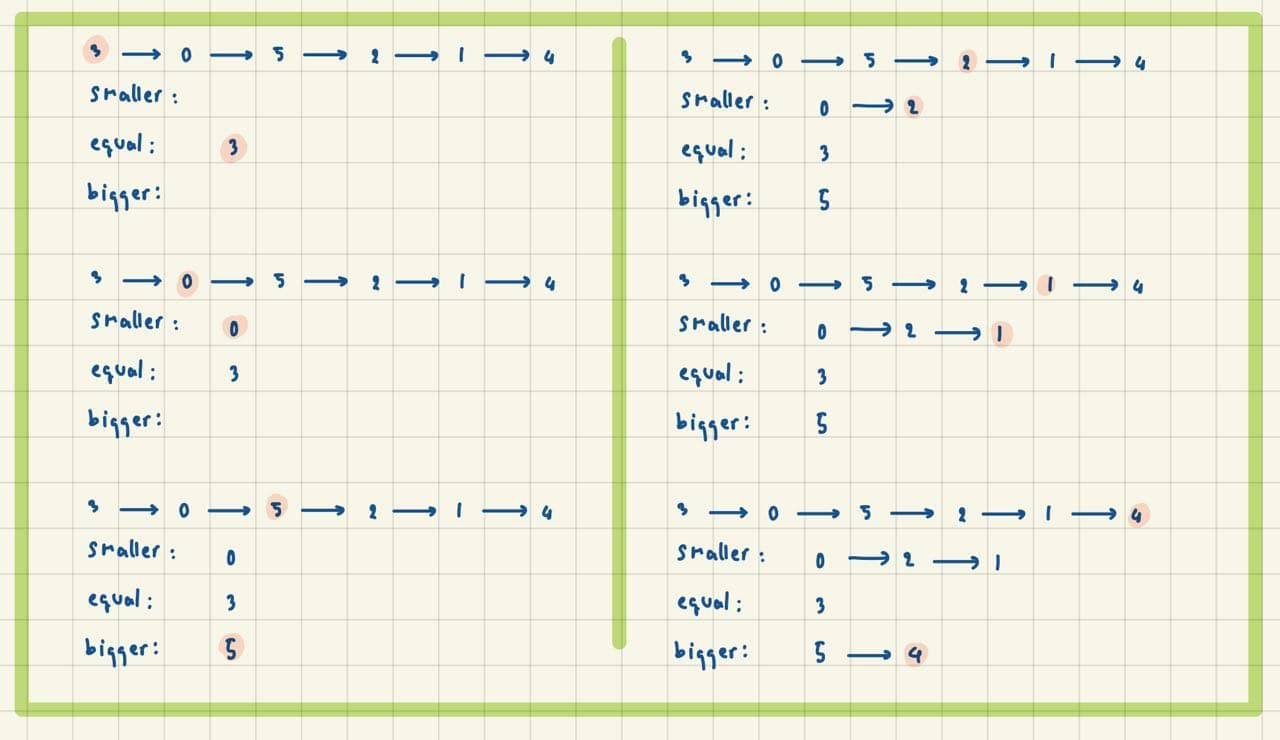